<a href="https://csdms.colorado.edu"><img style="float: center; width: 75%" src="https://raw.githubusercontent.com/BCampforts/evolving_landscapes/main/media/evolving_landscapes.png"></a>

# Advection 

## The equation
In this notebook, we will solve the advection equation: 
$$  \frac{\partial z}{\partial t} + v\frac{\partial z}{\partial x} =0\label{eq:1}\tag{1} $$
where $z$ is elevation, $x$ is horizontal distance (positive in the downslope direction) and $t$ is time and $v$ is velocity. 

## Advection? 
Advection is a transport mechanism of a substance or conserved property---temperature, moisture, aerosols---through the bulk motion of a fluid.

The advection equation has an analytical solution (see below), so why discretize?
Because not all forms of the analytical solution are known;
in fact, most of the time, an analytical solution is not known,
especially in the earth sciences, where sets of simultaneous, nonlinear, partial differential equations have to be solved.
To solve such equations in a coupled system, numerical methods are required.

In this notebook, we'll use a finite difference scheme based the simplest form of a truncated Taylor series expansion.
While alternative methods are available to solve PDEs,
many models in the geosciences use finite difference methods
because of their conceptual simplicity and ease of coding

### Solving the advection equation 

The advection PDE Eq. $\ref{eq:1}$ above is a prototype of an **initial value problem**: The solution is obtained by using the known initial values and marching or advancing in time. The solution of this equation can be obtained directly from the initial conditions:

$$ z(x,t) = z(x-vt,0) \label{eq:2}\tag{2}$$

In the following we will discretize Eq. $\ref{eq:1}$ using a first order, finite difference upwind scheme. 

All finite difference methods can be represented with a numerical stencil:

<img src="./media/Stencil1.png" style="width:3in;height:1in" />

For the upwind scheme in particular, we only need three nodes: 
<img src="./media/Stencil2.png" style="width:3in;height:1.25in" />

**BUT** the nodes you need to consider depend on the sign of the velocity: 
<img src="./media/UpwindScheme.png" style="width:6.5in;height:3.76in" />

If $v$ is positive, than the direction of the advected flow is from left to right along the $x$ axis. To capture such a positive flow, the upwind discretisation scheme uses the info from the neighboring node in the upwind direction, that is, the node to the left, indicated by $j-1$ on the sketch. In this case the the Finite Difference Equation (FDE) of Eq. $\ref{eq:1}$ can be written as:

$$\frac{\tilde{z}_j^{n+1} - \tilde{z}_j^n}{\Delta t} + v
\frac{\tilde{z}_j^n - \tilde{z}_{j-1}^n}{\Delta x} = 0
\label{eq:3}\tag{3}$$

If however, the velocity is negative, the FDE becomes: 

$$\frac{\tilde{z}_j^{n+1} - \tilde{z}_j^n}{\Delta t} + v
\frac{\tilde{z}_{j+1}^n - \tilde{z}_j^n}{\Delta x} = 0
\label{eq:4}\tag{4}$$

To obtain this equation, we have taken discrete values for $x$ and $t$: $x_j=j\Delta x$, $t_n = n \Delta t$. The solution of the finite difference equation is also defined at the discrete points ($j\Delta x$,$n \Delta t$): $\tilde{z}_j^n=\tilde{z}(j\Delta x,n \Delta t)$. Note that we used $z$ to denote the solution of the PDE
(continuous) and $\tilde{z}$ to denote the solution of the finite difference equation (FDE), a discrete solution. In the remainder of the notebook, we will use the symbol $C$ for both the analytical and numerical solution.


## Numerical solutions

In the following examples,
we'll explore numerical solutions to the advection equation.

We'll use NumPy for data and Matplotlib for visualization.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

First, develop some code that will represent a perturbation of some quantity that can be advected.
Here, we'll call it temperature,
but it could be any other passive scalar, like concentration of a pollutant.

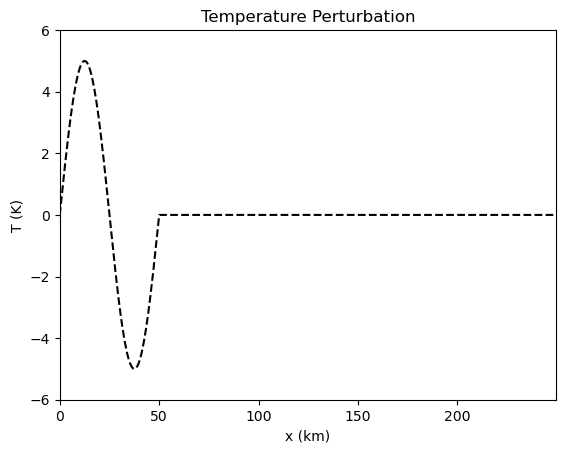

In [2]:
# Initialize constants
dx = 500  # spatial step (m)
wavelength = 5e4  # wavelength (m-1)
Lx = 25e4  # size of the domain (m)
amplitude = 5  # wave amplitude (K)

# Set up x-axis values
x = np.arange(start=0, stop=Lx, step=dx)

# Create truncated sine wave from x-axis values
b = x <= wavelength
c = x > wavelength
T = np.zeros_like(x)
T[b] = amplitude * np.sin(x[b] * 2 * np.pi / wavelength)
T[c] = 0

# Plot the graph
plt.figure()
plt.plot(x / 1.0e3, T, "--k")
plt.ylim((-6, 6))
plt.xlim((0, max(x / 1e3)))
plt.xlabel("x (km)")
plt.ylabel("T (K)")
plt.title("Temperature Perturbation")
plt.show()

Try modifying with the parameters (e.g., amplitude and wavelength) to better understand their meaning.

### Upwind solution

Now, lets solve the advection equation using the upwind FDE. You can use either `for` loops or vector operations (NumPy arrays) to iterate over the temperature vector in space. Start with the solution for positive velocity (that is, solve Eq. 3) and assume: 

- Wind speed `v = 10` m/s
- Grid spacing `dx = 500` m (see previous code block)
- Total model run duration = 3 hours
- Calculate time step `dt` using the CFL criterion: `dt = 0.9 * v / dx`
- Periodic boundary conditions: the solution at the left boundary depends on the solution at the right boundary if velocity is positive and vice versa for negative velocities. 
- Plot the wave every 10^5 iterations 

The structure of the code should look like this: 

~~~
# Set parameter values
v = 
run_duration = 
dt = 

# Initialize temperature array 
T = 
T[:] = 

# Calculate numerical solution
iter = 
while iter*dt < total_time:
    iter += 1
    if v > 0:
        # here comes the solution of the advection equation  
    
    if iter % 1e5 == 0: 
        plt.plot(x/1.e3, T, 'b') 
        plt.xlim((0, max(x/1e3)))
        plt.xlabel('x (km)')
        plt.ylabel('T (K)')
        plt.title("Advection of Temperature Perturbation")
        plt.show()
~~~

In [3]:
# Set parameter values
v = 10
run_duration = 3 * 60 * 60.0
dt = 0.9 * v / dx
print(f"Time step = {dt} s")

Time step = 0.018 s


In [4]:
# Initialize temperature array
T = np.zeros_like(x)
T[b] = amplitude * np.sin(x[b] * 2 * np.pi / wavelength)
T[c] = 0

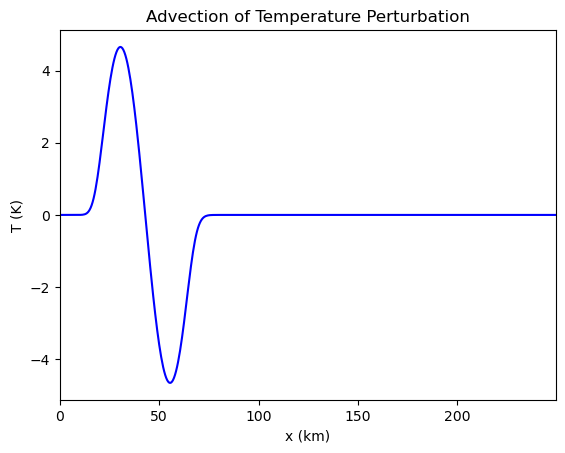

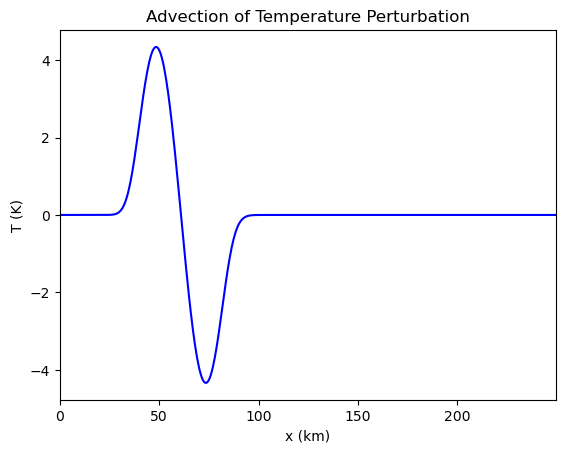

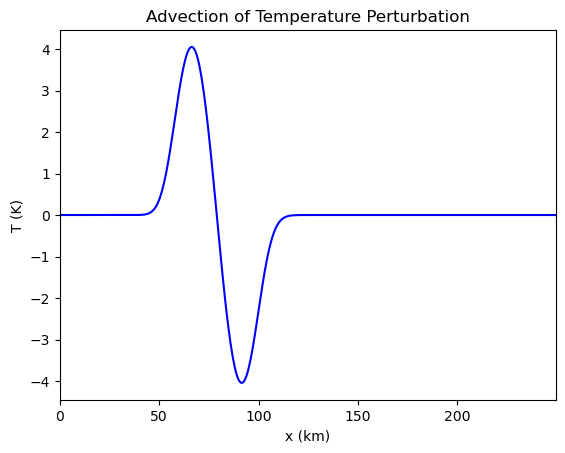

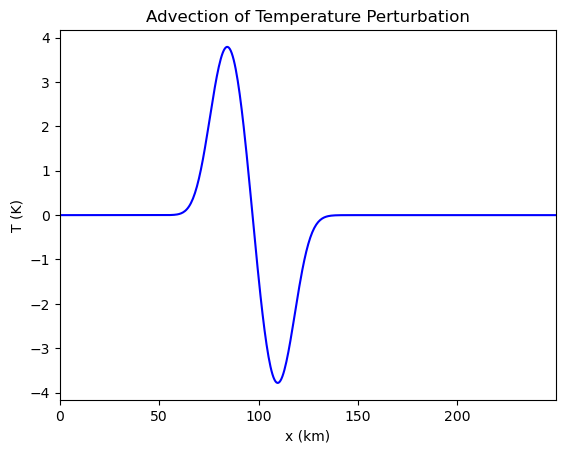

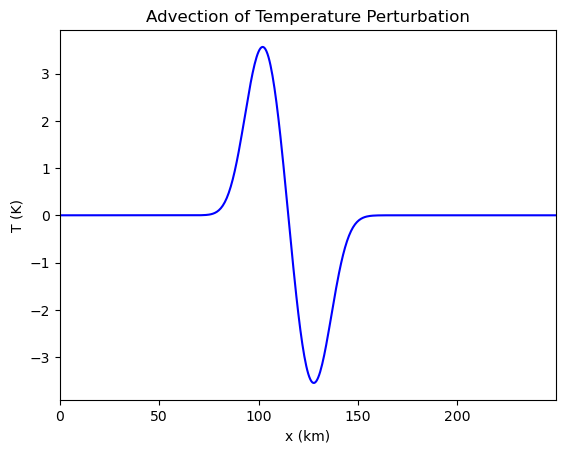

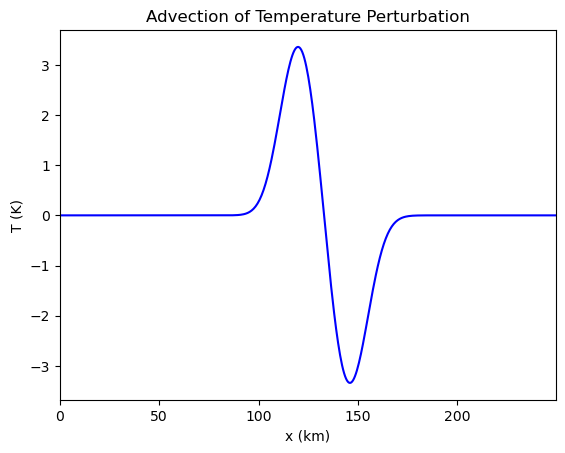

In [5]:
# Calculate numerical solution
iter = 0
while iter * dt < run_duration:
    iter += 1
    if v > 0:
        T[1:] -= v * dt / dx * (T[1:]-T[:-1])
        T[0] = T[-1]

    if iter % 1e5 == 0:
        plt.plot(x / 1.0e3, T, "b")
        plt.xlim((0, max(x / 1e3)))
        plt.xlabel("x (km)")
        plt.ylabel("T (K)")
        plt.title("Advection of Temperature Perturbation")
        plt.show()

In [6]:
### Downwind solution

Now, set the wind speed $v$ to -10 m/s and calculate the advection equation for negative velocities using Eq. 4.
Copy-paste your upwind solution and add the negative component to it.
Don't forget to reset the temperature array before you start. 

In [7]:
# Set parameter values
v = -10

In [8]:
# Initialize temperature array
T = np.zeros_like(x)
T[b] = amplitude * np.sin(x[b] * 2 * np.pi / wavelength)
T[c] = 0

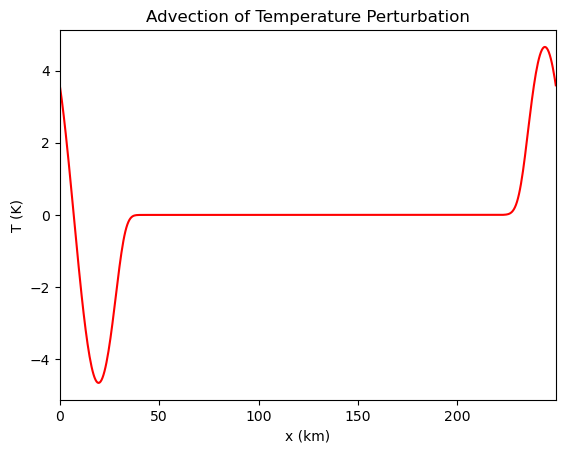

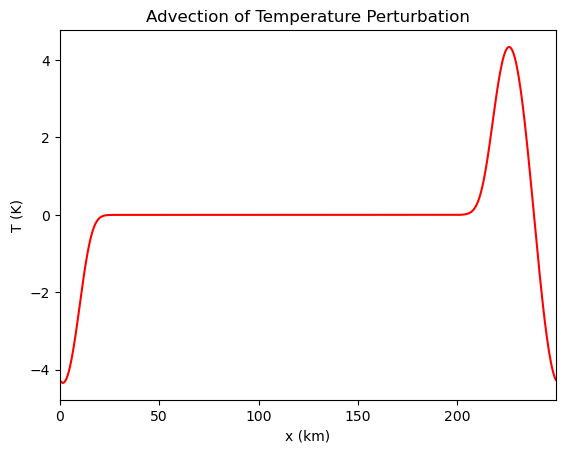

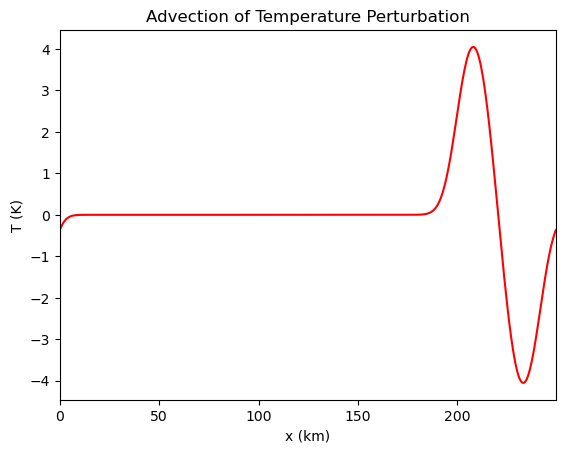

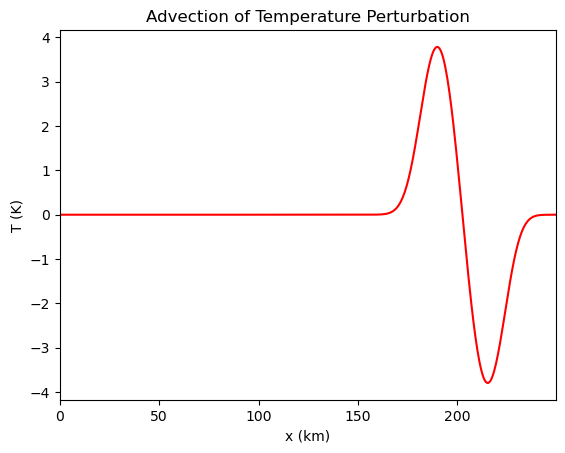

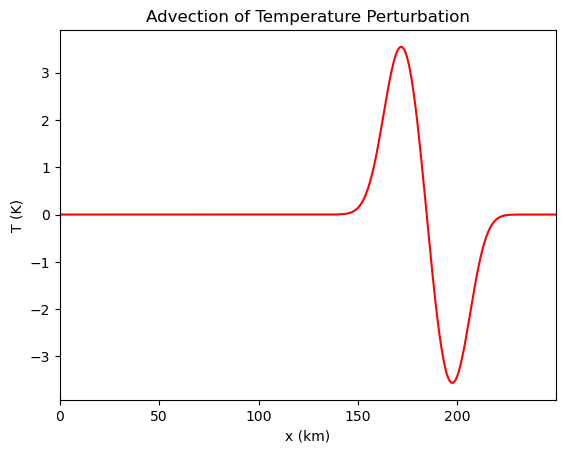

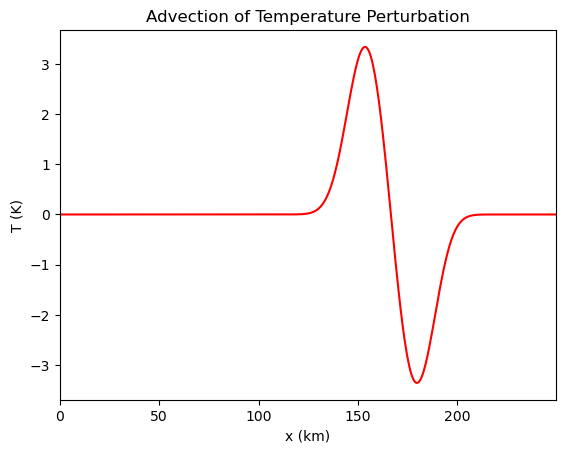

In [9]:
# Calculate numerical solution
iter = 0
while iter * dt < run_duration:
    iter += 1
    if v < 0:
        T[:-1] -= v * dt / dx * (T[1:]-T[:-1])
        T[-1] = T[0]

    if iter % 1e5 == 0:
        plt.plot(x / 1.0e3, T, "r")
        plt.xlim((0, max(x / 1e3)))
        plt.xlabel("x (km)")
        plt.ylabel("T (K)")
        plt.title("Advection of Temperature Perturbation")
        plt.show()

In [10]:
### Analytical solution

Can you find an analytical solution for this problem?
Use the [numpy roll function](https://numpy.org/doc/stable/reference/generated/numpy.roll.html). 
Plot and compare with the numerical solution. 

In the following, solve advection in the advection_solver function.
What is going on here. What can we do to resolve this issue?

In [13]:
# Create and use advetion solver function
def advection_solver(T_num,v,dt,dx,run_duration):
    iter = 0
    #Numerical solution 
    while iter * dt < run_duration:
        iter += 1
        if v > 0:
            T_num[1:] -= v * dt / dx * (T_num[1:]-T_num[:-1])
            T_num[0] = 0
        elif v < 0:
            T_num[:-1] -= v * dt / dx * (T_num[1:]-T_num[:-1])
            T_num[-1] = 0
    return T_num

Time step = 0.018 s
Total shift is  108000.0


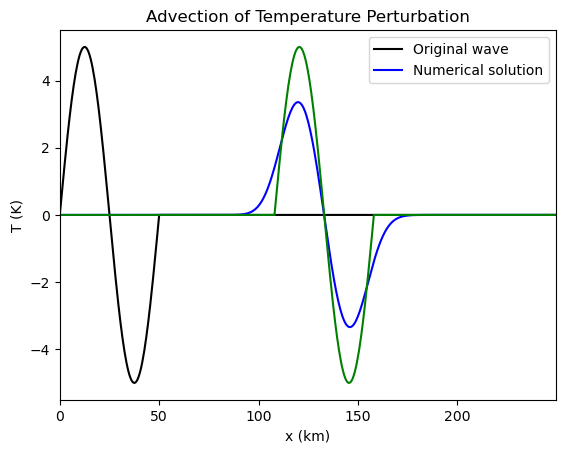

In [14]:
# Set parameter values
v = 10
run_duration = 3 * 60 * 60.0
dt = 0.9 * v / dx
print(f"Time step = {dt} s")

# Initialize temperature array
T_num = np.zeros_like(x)
T_num[b] = amplitude * np.sin(x[b] * 2 * np.pi / wavelength)
T_num[c] = 0
T_an = np.array(T_num)

plt.plot(x / 1.0e3, T_num, "k",label = 'Original wave')

T_num = advection_solver(T_num,v,dt,dx,run_duration)

plt.plot(x / 1.0e3, T_num, "b",label = 'Numerical solution')


# Analytical solution 
total_shift = run_duration*v
print('Total shift is ', total_shift)
T_an = np.roll(T_an, int(total_shift/dx))
plt.plot(x / 1.0e3, T_an, "g")


plt.xlim((0, max(x / 1e3)))
plt.xlabel("x (km)")
plt.ylabel("T (K)")
plt.title("Advection of Temperature Perturbation")
plt.legend()
plt.show()

## References

Howard, A. D., Dietrich, W. E., & Seidl, M. A. (1994). Modeling fluvial erosion on regional to continental scales. Journal of Geophysical Research: Solid Earth, 99(B7), 13971-13986.

Tucker, G. E., & Hancock, G. R. (2010). Modelling landscape evolution. Earth Surface Processes and Landforms, 35(1), 28–50. https://doi.org/10.1002/esp.1952

Whipple, K. X., Hancock, G. S., & Anderson, R. S. (2000). River incision into bedrock: Mechanics and relative efficacy of plucking, abrasion, and cavitation. Geological Society of America Bulletin, 112(3), 490-503.

Whipple, K. X., & Tucker, G. E. (1999). Dynamics of the stream‐power river incision model: Implications for height limits of mountain ranges, landscape response timescales, and research needs. Journal of Geophysical Research: Solid Earth, 104(B8), 17661-17674.


## River incision topics:
1. [A general solution for the advection equation](advection.ipynb)
1. [Fluvial incision with the advection equation](fluvial_advection.ipynb)
1. [Stream power law](stream_power_law.ipynb)